In [1]:
import sys
from datetime import date
sys.path.append('../../')
from LIB.utils import *
from mpl_toolkits import mplot3d

In [2]:
# read all the datasets files
DATA_PATH = '../data/'
train = pd.read_csv(DATA_PATH+'Train.csv')
test = pd.read_csv(DATA_PATH+'Test.csv')
columns = pd.read_csv(DATA_PATH+'VariableDefinitions.csv')
drivers = pd.read_csv(DATA_PATH+'Riders.csv')

In [3]:
def seconde_to_minute(s):
    """
    converts the time to deliver from seconds to minutes
    """
    s= s*0.0166667
    return s
def seconde_to_hours(s):
    """
    converts the time to deliver from seconds to hours
    """
    s= s*0.000277778
    return s

In [4]:
# merge drivers's informations with the train and test datasets
train = train.merge(drivers, on='Rider Id', how='left')
test = test.merge(drivers, on='Rider Id', how='left')

In [58]:
# this is a function that gives a quick review about the data
data_characterization(drivers)

shape of data : (960, 5)


,Columns name,Type,Count unique values,Count Nan values,Ratio Nan values,Unique values,Max,Min,Mean
0,Rider Id,object,960,0,0.0000,"[Rider_Id_396, Rider_Id_479, Rider_Id_648, Rid...",0.0000,0.0000,0.0000
1,No_Of_Orders,int64,811,0,0.0000,"[2946, 360, 1746, 314, 536, 2608, 3464, 4831, ...",9756.0000,2.0000,1864.8510
2,Age,int64,725,0,0.0000,"[2298, 951, 821, 980, 1113, 1798, 1304, 2124, ...",3764.0000,96.0000,1200.2344
3,Average_Rating,float64,45,0,0.0000,"[14.0, 13.5, 14.3, 12.5, 13.7, 13.2, 13.4, 14....",15.2000,0.0000,13.4126
4,No_of_Ratings,int64,553,0,0.0000,"[1159, 176, 466, 75, 156, 504, 950, 1469, 610,...",2298.0000,0.0000,427.9833


In [59]:
# column description
display(columns)

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31
5,Placement - Weekday (Mo = 1),Placement - Weekday (Monday = 1)
6,Placement - Time,Placement - Time - Time of day the order was p...
7,Confirmation - Day of Month,Confirmation - Day of Month i.e 1-31
8,Confirmation - Weekday (Mo = 1),Confirmation - Weekday (Monday = 1)
9,Confirmation - Time,Confirmation - Time - Time of day the order wa...


In [60]:
# descriptive that summarize some statistics and characteristics of the data
data_characterization(train)

shape of data : (21201, 60)


,Columns name,Type,Count unique values,Count Nan values,Ratio Nan values,Unique values,Max,Min,Mean
0,Order No,object,21201,0,0.0000,"[Order_No_4211, Order_No_25375, Order_No_1899,...",0.0000,0.0000,0.0000
1,User Id,object,3186,0,0.0000,"[User_Id_633, User_Id_2285, User_Id_265, User_...",0.0000,0.0000,0.0000
2,Vehicle Type,object,1,0,0.0000,[Bike],0.0000,0.0000,0.0000
3,Platform Type,int64,4,0,0.0000,"[3, 1, 2, 4]",4.0000,1.0000,2.7522
4,Personal or Business,object,2,0,0.0000,"[Business, Personal]",0.0000,0.0000,0.0000
5,Placement - Day of Month,int64,31,0,0.0000,"[9, 12, 30, 15, 13, 14, 11, 23, 2, 25, 19, 28,...",31.0000,1.0000,15.6537
6,Placement - Weekday (Mo = 1),int64,7,0,0.0000,"[5, 2, 1, 3, 4, 6, 7]",7.0000,1.0000,3.2401
7,Placement - Time,object,15686,0,0.0000,"[9:35:46 AM, 11:16:16 AM, 12:39:25 PM, 9:25:34...",0.0000,0.0000,0.0000
8,Confirmation - Day of Month,int64,31,0,0.0000,"[9, 12, 30, 15, 13, 14, 11, 23, 2, 25, 19, 28,...",31.0000,1.0000,15.6538
9,Confirmation - Weekday (Mo = 1),int64,7,0,0.0000,"[5, 2, 1, 3, 4, 6, 7]",7.0000,1.0000,3.2402


(36.6, 37)

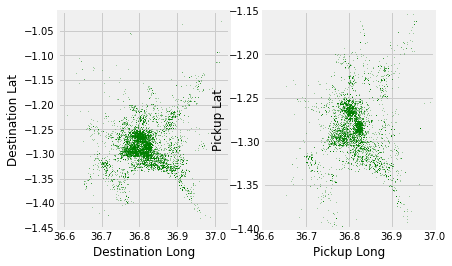

In [18]:
# plot the pickup and destinations locations
fig, ax = plt.subplots(1,2)

city_long_border = (36.6, 37)
city_lat_border = (-1.40, -1.15)
train.plot(kind='scatter', x='Destination Long', y='Destination Lat',
                color='green', 
                s=.1, alpha=.6, ax=ax[0])
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

city_long_border = (36.6, 37)
city_lat_border = (-1.40, -1.15)
train.plot(kind='scatter', x='Pickup Long', y='Pickup Lat',
                color='green', 
                s=.1, alpha=.6, ax=ax[1])
plt.ylim(city_lat_border)
plt.xlim(city_long_border)

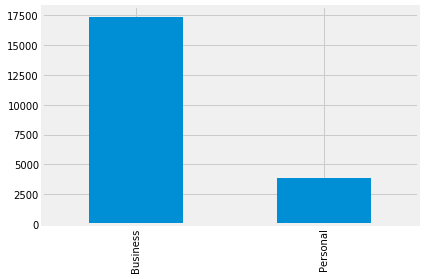

In [61]:
# distribution of 'Personal or Business' column
train['Personal or Business'].value_counts().plot(kind='bar')

In [62]:
# do the time to delivery increase or decrease depending on the type of business ?
train.groupby('Personal or Business')['Time from Pickup to Arrival'].mean()

Personal or Business
Business   1550.7433
Personal   1585.0563
Name: Time from Pickup to Arrival, dtype: float64

In [63]:
# statistics of the time to deliver depending on the placement weekday
train.groupby('Placement - Weekday (Mo = 1)')['Time from Pickup to Arrival'].describe()

,count,mean,std,min,25%,50%,75%,max
Placement - Weekday (Mo = 1),,,,,,,,
1,3789.0000,1496.0813,943.4182,1.0000,871.0000,1320.0000,1932.0000,7883.0000
2,3959.0000,1589.9763,1017.7945,1.0000,887.0000,1394.0000,2089.0000,7714.0000
3,3823.0000,1573.3795,986.3008,1.0000,889.5000,1388.0000,2100.0000,7646.0000
4,4228.0000,1556.1062,1003.6014,1.0000,879.7500,1363.0000,2011.2500,7491.0000
5,3993.0000,1595.1788,996.0250,1.0000,897.0000,1408.0000,2111.0000,7100.0000
6,1223.0000,1445.6852,930.6978,1.0000,810.0000,1266.0000,1875.0000,6585.0000
7,186.0000,1683.0323,913.8318,2.0000,1018.2500,1552.5000,2163.5000,5244.0000


In [64]:
# statistics of the time to deliver depending on the plateform type
train.groupby('Platform Type')['Time from Pickup to Arrival'].describe()

,count,mean,std,min,25%,50%,75%,max
Platform Type,,,,,,,,
1,2147.0000,1572.7997,874.1754,3.0000,945.0000,1379.0000,1994.0000,7277.0000
2,980.0000,1540.8612,935.3714,9.0000,901.0000,1343.5000,1941.2500,7883.0000
3,18054.0000,1555.7734,1002.6626,1.0000,870.0000,1369.5000,2050.0000,7714.0000
4,20.0000,1675.1500,942.3850,356.0000,1108.0000,1539.0000,2445.7500,3568.0000


## When the orders tend to happen? 

In [65]:
# morning or evenening 
train['Placement am-pm'] = train['Placement - Time'].str[-2:]
train['Arrival at Pickup am-pm'] = train['Arrival at Pickup - Time'].str[-2:]
train['PickupTimeHour'] = pd.to_datetime(train['Pickup - Time'], format='%H:%M:%S %p').dt.hour
train.loc[train['Arrival at Pickup am-pm']=='PM', 'PickupTimeHour'] = train.loc[train['Arrival at Pickup am-pm']=='PM', 'PickupTimeHour'] +12
train.loc[train.PickupTimeHour==24,'PickupTimeHour'] = 0

In [66]:
test['Placement am-pm'] = test['Placement - Time'].str[-2:]
test['Arrival at Pickup am-pm'] = test['Arrival at Pickup - Time'].str[-2:]
test['PickupTimeHour'] = pd.to_datetime(test['Pickup - Time'], format='%H:%M:%S %p').dt.hour
test.loc[test['Arrival at Pickup am-pm']=='PM', 'PickupTimeHour'] = test.loc[test['Arrival at Pickup am-pm']=='PM', 'PickupTimeHour'] +12
test.loc[test.PickupTimeHour==24,'PickupTimeHour'] = 0

Text(0.5, 1.0, 'Arrival at Pickup')

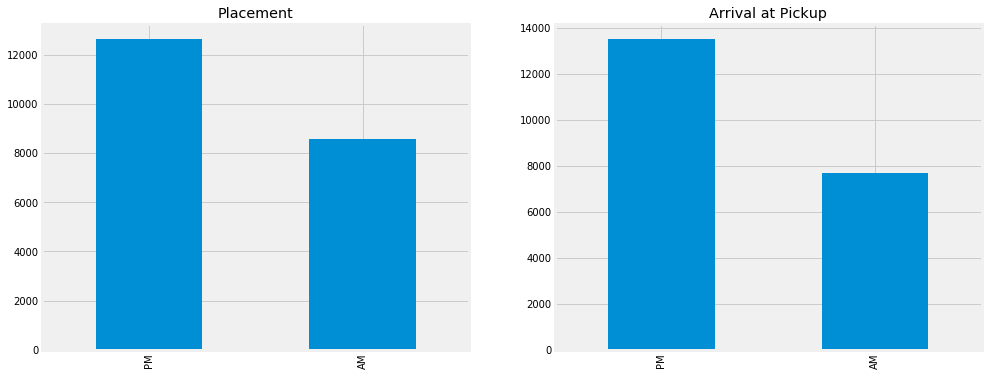

In [19]:
fig = plt.figure(figsize=(15,6))
ax1 = plt.subplot(1,2,1)
train['Placement am-pm'].value_counts().plot(kind='bar', ax=ax1)
plt.title('Placement')
ax2 = plt.subplot(1,2,2)
train['Arrival at Pickup am-pm'].value_counts().plot(kind='bar')
plt.title('Arrival at Pickup')

### Calculation of some time constraints

In [20]:
time = ['Placement - Time', 'Confirmation - Time', 'Pickup - Time', 'Arrival at Pickup - Time']
for c in time:
    test[c] = pd.to_datetime(test[c], format='%H:%M:%S %p').dt.time
    train[c] = pd.to_datetime(train[c], format='%H:%M:%S %p').dt.time

In [22]:
# Does this dataSet includes only express orders?

train['daysConfirmation'] = train['Confirmation - Day of Month'] - train['Placement - Day of Month']
print(train['daysConfirmation'].value_counts())

# Depending on the problem description on zindi, we should only have express ordres.
train = train[train.daysConfirmation==0]

train['secondsUntilConfirmation'] = (train['Confirmation - Time'].apply(lambda x: datetime.combine(date.today(), x))-\
train['Placement - Time'].apply(lambda x: datetime.combine(date.today(), x))).dt.seconds
del(train['daysConfirmation'])

In [23]:

test['daysConfirmation'] = test['Confirmation - Day of Month'] - test['Placement - Day of Month']
print(test['daysConfirmation'].value_counts())

test = test[test.daysConfirmation==0]

test['secondsUntilConfirmation'] = (test['Confirmation - Time'].apply(lambda x: datetime.combine(date.today(), x))-\
test['Placement - Time'].apply(lambda x: datetime.combine(date.today(), x))).dt.seconds
del(test['daysConfirmation'])

0    7068
Name: daysConfirmation, dtype: int64


In [25]:
train['daysArrival'] = train['Arrival at Destination - Day of Month'] - train['Confirmation - Day of Month']
train['daysArrival'].value_counts()

train['secondsUntilArrival'] = (train['Arrival at Pickup - Time'].apply(lambda x: datetime.combine(date.today(), x))-\
train['Confirmation - Time'].apply(lambda x: datetime.combine(date.today(), x))).dt.seconds
# del(train['daysArrival'])

train['waitingTime'] = (train['Pickup - Time'].apply(lambda x: datetime.combine(date.today(), x))-\
train['Arrival at Pickup - Time'].apply(lambda x: datetime.combine(date.today(), x))).dt.seconds

In [26]:
test['secondsUntilArrival'] = (test['Arrival at Pickup - Time'].apply(lambda x: datetime.combine(date.today(), x))-\
test['Confirmation - Time'].apply(lambda x: datetime.combine(date.today(), x))).dt.seconds

test['waitingTime'] = (test['Pickup - Time'].apply(lambda x: datetime.combine(date.today(), x))-\
test['Arrival at Pickup - Time'].apply(lambda x: datetime.combine(date.today(), x))).dt.seconds

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6c2c02f60>],
      dtype=object)

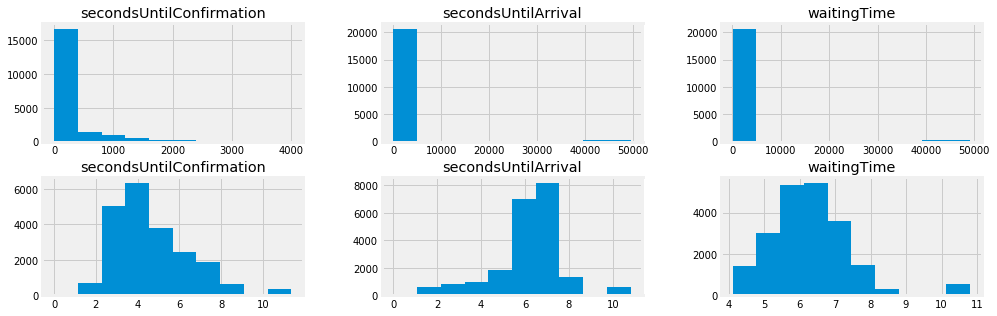

In [27]:
fig, axs = plt.subplots(2,3,figsize=(15,5))
train[['secondsUntilConfirmation']].hist(range=(0,4000), ax=axs[0,0]) 
train[['secondsUntilArrival']].hist(ax=axs[0,1]) 
train[['waitingTime']].hist(ax=axs[0,2]) 

np.log1p(train[['secondsUntilConfirmation']]).hist(ax=axs[1,0]) 
np.log1p(train[['secondsUntilArrival']]).hist(ax=axs[1,1]) 
np.log1p(train[['waitingTime']]).hist(ax=axs[1,2])

## Does delivering to businesses cost less waiting time to drivers?

Text(1000, 4000, 'mean wainting time in minutres :31.96')

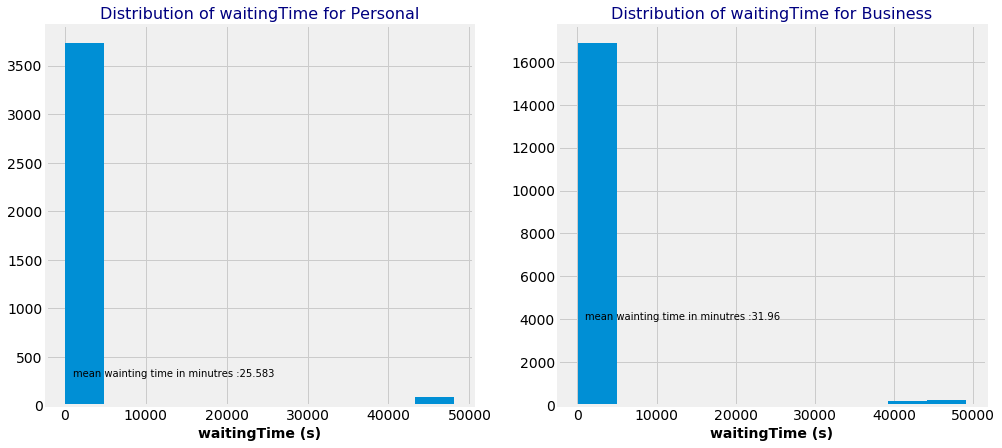

In [29]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
freq, bins = np.histogram(train[train['Personal or Business']=='Personal']['waitingTime'], bins=10)
ax1.hist(train[train['Personal or Business']=='Personal']['waitingTime'], bins=bins)

plt.xlabel('waitingTime (s)', fontsize=14, weight='bold')
plt.ylabel('')
plt.tick_params(labelsize=14)
plt.title('Distribution of waitingTime for Personal', color='navy', fontsize=16)
mean_ = seconde_to_minute(train[train['Personal or Business']=='Personal']['waitingTime'].mean())
plt.text(1000,300, 'mean wainting time in minutres :{}'.format(round(mean_,3)))

ax2 = plt.subplot(1,2,2)
freq, bins = np.histogram(train[train['Personal or Business']=='Business']['waitingTime'], bins=10)
ax2.hist(train[train['Personal or Business']=='Business']['waitingTime'], bins=bins)

plt.xlabel('waitingTime (s)', fontsize=14, weight='bold')
plt.ylabel('')
plt.tick_params(labelsize=14)
plt.title('Distribution of waitingTime for Business', color='navy', fontsize=16)
mean_ = seconde_to_minute(train[train['Personal or Business']=='Business']['waitingTime'].mean())
plt.text(1000,4000, 'mean wainting time in minutres :{}'.format(round(mean_,3)))


## mean speed for each order

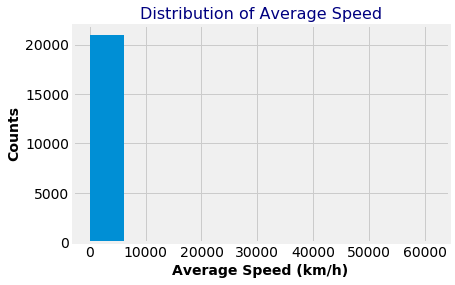

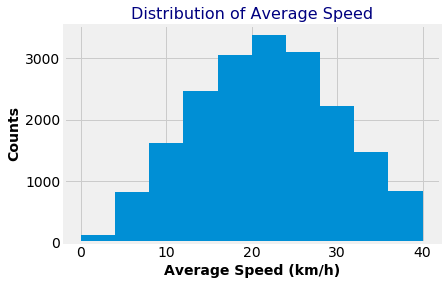

In [67]:
train['TimeHours'] =train['Time from Pickup to Arrival'].apply(lambda x:seconde_to_hours(x))
train['mean_speed_km/h'] = ((train['Distance (KM)'])/train['TimeHours'])

fig, ax = plt.subplots(1,1)

ax.hist(train['mean_speed_km/h'])

plt.xlabel('Average Speed (km/h)', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Average Speed', color='navy', fontsize=16)
plt.show()

freq, bins = np.histogram(train['mean_speed_km/h'], bins=10, range=(0, 40))

fig, ax = plt.subplots(1,1)


ax.hist(train['mean_speed_km/h'].dropna(), bins)

plt.xlabel('Average Speed (km/h)', fontsize=14, weight='bold')
plt.ylabel('Counts', fontsize=14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Distribution of Average Speed', color='navy', fontsize=16)
plt.show()



In [19]:
# depending on the anomalies detected in the average speed per order ( non logical speed value), we will remove them from the train dataset.
print(np.quantile(train['mean_speed_km/h'], 0.9))
print((train[train['mean_speed_km/h']>np.quantile(train['mean_speed_km/h'], 0.9)].shape[0]/train.shape[0])*100)
train = train[train['mean_speed_km/h']<=np.quantile(train['mean_speed_km/h'], 0.9)]

In [96]:
s = train.placementTimeHour.value_counts(normalize=True)
print(s[(s.index>8)&(s.index<18)].sum())
print(s[(s.index>=18)].sum())

0.8039410932341073
0.016403752423877156


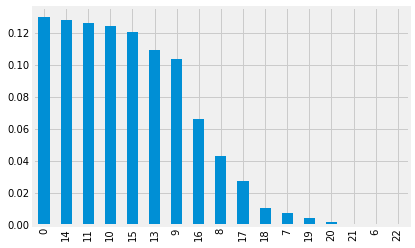

In [91]:
# train['placementTimeHour'] = pd.to_datetime(train['Placement - Time'], format='%H:%M:%S %p').dt.hour
# train['placement time am-pm'] = train['Placement - Time'].str[-2:]
train.loc[train['placement time am-pm']=='PM', 'placementTimeHour'] = train.loc[train['placement time am-pm']=='PM', 'placementTimeHour'] +12
train.loc[train.placementTimeHour==24,'placementTimeHour'] = 0


train.placementTimeHour.value_counts(normalize=True).plot(kind='bar')
# train.PickupTimeHour.value_counts().plot(kind='bar')

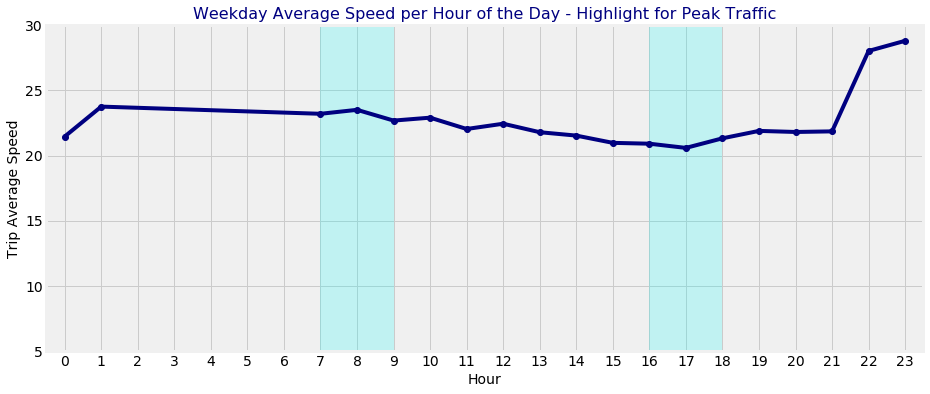

In [71]:
#Plot Peak Hour Median Trip Average Speed During Weekdays:

plt.figure(figsize =(14, 6))
df = train.groupby('PickupTimeHour')['mean_speed_km/h'].median()
#weekdays only: rush hour traffic 7-9 + 17-19

# ax.set_axis_bgcolor('#F9F9F9')
ax = df.plot(marker = 'o', color = 'navy')
plt.fill([7,9,9,7], [0,0,30,30], 'cyan', alpha=0.2)
plt.fill([16,18,18,16], [0,0,30,30], 'cyan', alpha=0.2)
plt.xticks(range(24))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Trip Average Speed', fontsize=14)
plt.ylim(5, 30)
plt.xlim(-0.5, 23.5)
plt.tick_params(labelsize=14)
plt.title('Weekday Average Speed per Hour of the Day - Highlight for Peak Traffic', fontsize = 16, color='navy')
plt.show()

## Trip Distance versus Trip Duration

(12898, 3)


Text(0.5, 1.0, 'Average Trip Duration and Distance per Origin-Destination Pair')

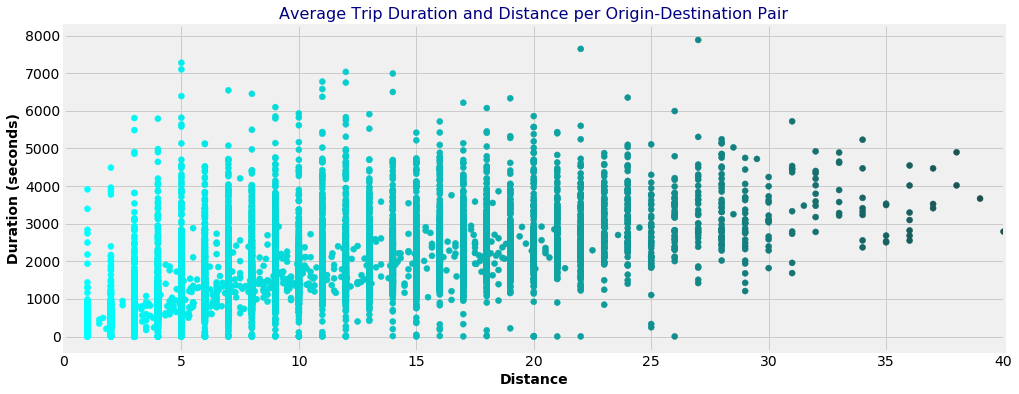

In [20]:
df = train.groupby(['coordinatesDestination','coordinatesPickup'])['Distance (KM)','Time from Pickup to Arrival', 'Average_Rating'].agg(
    {'mean':'mean'})
df.columns = [col[0]+col[1] for col in df.columns]
print(df.shape)
# df['meanTime from Pickup to Arrival'] =df['meanTime from Pickup to Arrival'].apply(lambda x:seconde_to_minute(x))
plt.figure(figsize = (15,6))
cmap = sns.dark_palette('cyan', 3, reverse = True, as_cmap=True)
plt.scatter(df['meanDistance (KM)'], df['meanTime from Pickup to Arrival'], c=df['meanDistance (KM)'], cmap= cmap)

font = {'color': 'red', 'size': 14, 'family': 'Tahoma'}
plt.xlim(0, 40)
plt.xlabel('Distance', fontsize = 14, weight='bold')
plt.ylabel('Duration (seconds)', fontsize = 14, weight='bold')
plt.tick_params(labelsize=14)
plt.title('Average Trip Duration and Distance per Origin-Destination Pair', fontsize = 16, color='navy')

In [67]:
# do the this comportement depends on the rider's behaviour? or the age ?

[]

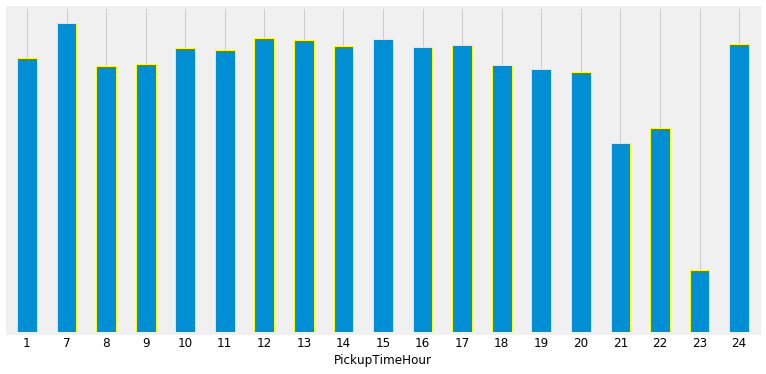

In [48]:
df = train.groupby(['PickupTimeHour','coordinatesDestination','coordinatesPickup'])['Time from Pickup to Arrival'].agg(
    {'moyenne':'mean'}).reset_index()
df = df.groupby('PickupTimeHour').moyenne.mean()
fig = plt.figure()
labels_list = df.values.round(1)
kwargs = {'fontsize': 12, 'ha':'center', 'va': 'bottom', 'weight': 'bold', 'color': 'navy'}

ax = df.plot(kind='bar', rot = 0, figsize = (12, 6), fontsize = 12, edgecolor='yellow', linewidth=1)
# ax.set_xticklabels(weekday_labels, weight='bold')
# ax.set_axis_bgcolor('#F9F9F9')
ax.get_yaxis().set_ticks([])

In [46]:
train.to_csv(DATA_PATH+'processed_data/trainV1.csv', index=False)
test.to_csv(DATA_PATH+'processed_data/testV1.csv', index=False)